In [3]:
# Dependencies
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Credentials
from config import clientID, clientSEC
client_credentials_manager = SpotifyClientCredentials(client_id=clientID, client_secret=clientSEC)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
AUTH_URL = 'https://accounts.spotify.com/api/token'

In [8]:
# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': clientID,
    'client_secret': clientSEC,
})

# Convert the response to JSON
auth_response_data = auth_response.json()

# Save the access token
access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

BASE_URL = 'https://api.spotify.com/v1/'

In [9]:
# Date Ranges
starting_month = 4
ending_month = 4
starting_year = 2019
ending_year = 2021
years = ending_year - starting_year
months = (ending_month-starting_month) + years*12

In [10]:
# country use an ISO code from below
country = "IT" # Italy

"""
['AD', 'AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'EC', 'SV', 'EE', 'FI'
, 'FR','DE', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'ID', 'IE', 'IT', 'JP', 'LV', 'LI', 'LT', 'LU', 'MY', 'MT', 'MX', 'MC'
, 'NL', 'NZ','NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'ES', 'SK', 'SE', 'CH', 'TW', 'TR', 'GB', 'US', 'UY']
"""

"\n['AD', 'AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'EC', 'SV', 'EE', 'FI'\n, 'FR','DE', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'ID', 'IE', 'IT', 'JP', 'LV', 'LI', 'LT', 'LU', 'MY', 'MT', 'MX', 'MC'\n, 'NL', 'NZ','NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'ES', 'SK', 'SE', 'CH', 'TW', 'TR', 'GB', 'US', 'UY']\n"

    danceability  energy   key  loudness  speechiness  acousticness  \
0         1.0680  0.8960  12.0   -25.217       0.0699      1.249000   
1         0.0000  0.0000   0.0     0.000       0.0000      0.000000   
2         1.5320  1.4140  21.0   -23.642       0.2397      1.288200   
3         3.5140  3.0542  23.0   -58.248       0.2646      2.448000   
4         0.5010  0.4050   1.0    -5.679       0.0319      0.751000   
5         0.4600  0.3260   7.0   -10.699       0.0417      0.142000   
6         2.1810  2.3880  18.0   -17.333       0.4837      0.401000   
7         1.6570  0.9870  10.0   -18.586       0.1471      0.853400   
8         2.2980  2.2965  23.0   -32.088       0.1677      1.487990   
9         3.3580  2.9770  28.0   -36.238       0.3996      1.299400   
10        2.8000  3.4910  37.0   -29.429       0.5093      1.639800   
11        7.8480  8.9960  87.0  -182.140       0.8792      3.712955   
0         0.2070  0.0854   2.0   -19.104       0.0420      0.976000   
1     

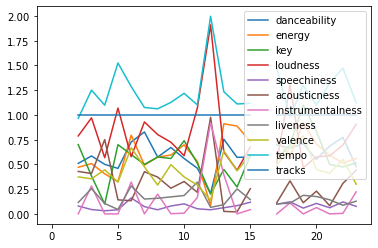

In [11]:
df_list = []
for l in range(years):
    # Initialize DataSet
    df = pd.DataFrame(np.zeros([12, 11]), columns=["danceability", "energy",
                                            "key", "loudness", "speechiness", "acousticness",
                                            "instrumentalness", "liveness",
                                            "valence", "tempo", "tracks"])

    for i in range(1): # Sample of 50 tracks per loop
        track_results = sp.search(market=country, q='year:' + str(starting_year + l), type='track', limit=50,offset=i)
        for track in track_results['tracks']['items']:

            # Make sure results are within timeline
            album = sp.album(track["album"]["external_urls"]["spotify"])
            try:
                m = int(album["release_date"].split("-")[1])
            except IndexError:
                continue # When no month dates

            #print(track)

            # Track ID from the URI
            track_id = track["id"]#'6y0igZArWVi6Iz0rj35c1Y'

            # actual GET request with proper header
            r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)
            #print(r.text)

            for i in df.columns:

                try:
                    a = float(r.text.split(i + '" : ')[1].split(",")[0])
                except:
                    continue
                df.loc[m-1][i] += a
            df.loc[m-1][10] += 1
    df_list.append(df)


df = pd.concat(df_list)
print(df)
for col in df.columns:
    c = df[col]/df["tracks"]

    # refigure mean of data to 0
    c = abs(c)
    while np.mean(c) > 10 or max(c) > 8:
        c = c/10

    plt.plot(range(12*len(df_list)), c)

plt.legend(df.columns)
plt.show()

